In [1]:
from linares_plot import *
import scipy.io as io
import pickle
from scipy.ndimage import gaussian_filter
from scipy import misc
import os


In [3]:
path_ = 'C:\\Users\\David\\Desktop\\IDIBAPS\\brian_simulations\\r2'
all_= os.listdir(path_)

In [4]:
len(all_)

641

In [23]:
data = io.loadmat(path_ + '\\' + all_[500]) #,{'rate':rates, 'spktm': spikes.it})
data.keys()

dict_keys(['__version__', 'pos_stim', 'errtm', 'dectm', '__header__', 'ratedelay', '__globals__', 'IEext'])

In [24]:
len(data['ratedelay'][0])

16000

In [25]:
data['IEext'][0][0]

0.5

In [26]:
data['pos_stim'][0][0]

0.0

In [46]:
rates_=[]
pos_stim = []
Iexts=[]

for sim_ in range(len(all_)): #len(all_)
    simx = io.loadmat(path_ + '\\' + all_[sim_])
    rates_.append(simx['ratedelay'][0])
    pos_stim.append(360*simx['pos_stim'][0][0])
    Iexts.append(simx['IEext'][0][0])

###
Rates = np.array(rates_)
IExts = np.array(Iexts) 
Positions=np.array(pos_stim)

In [39]:
np.shape(Rates)

(641, 16000)

In [40]:
Rates

array([[12.25,  0.25, 18.5 , ..., 32.  ,  0.5 ,  0.75],
       [12.5 ,  0.5 , 19.5 , ..., 31.25,  0.  ,  0.75],
       [13.25,  0.5 , 19.5 , ..., 31.5 ,  0.5 ,  0.5 ],
       ...,
       [ 0.  ,  0.  ,  0.25, ...,  6.25,  0.  ,  0.  ],
       [ 0.25,  0.  ,  0.  , ...,  6.75,  0.  ,  0.  ],
       [ 0.25,  0.  ,  0.  , ...,  6.25,  0.  ,  0.  ]])

In [47]:
np.unique(IExts)

array([0.  , 0.25, 0.5 ])

In [50]:
len(IExts[IExts==0])

250

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


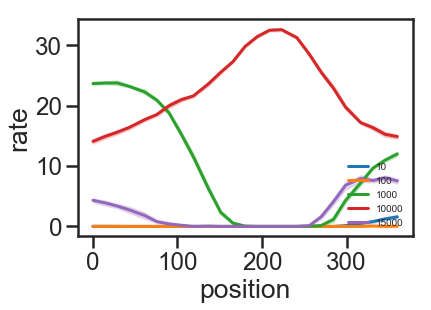

In [66]:
Iext_ = 0
for Neuron in [10,100,1000,10000,15000]:
    ## each column is a neuron
    nx_rates = Rates[:,Neuron]
    nx_positions = Positions
    ## get the ones according to the Iext you want
    nx_rates=nx_rates[IExts==Iext_]
    nx_positions=nx_positions[IExts==Iext_]
    dfx = pd.DataFrame({'position':nx_positions, 'rate':nx_rates, 'Neuron':Neuron})
    sns.lineplot('position', 'rate', data=dfx, label=dfx.Neuron.iloc[0])
    
plt.legend(loc="lower right", fontsize=10, frameon=False)

In [77]:
index_max_rate = np.where(dfx['rate']==dfx['rate'].max())[0][0]
RF_center = dfx['position'].iloc[index_max_rate]
dfx['RF_center'] = RF_center

316.8

In [67]:
45/2

22.5

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


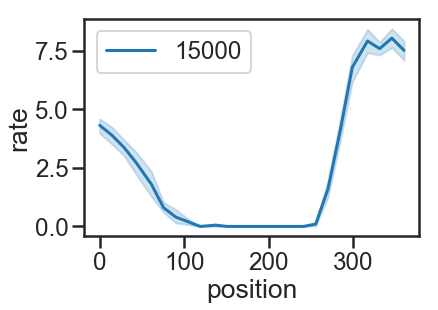

In [64]:
sns.lineplot('position', 'rate', data=dfx, label=dfx.Neuron.iloc[0])

In [54]:
len(nx_positions)

250

In [55]:
nx_positions

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,  14.4,  14.4,  14.4,  14.4,  14.4,  14.4,  14.4,  14.4,
        14.4,  14.4,  28.8,  28.8,  28.8,  28.8,  28.8,  28.8,  28.8,
        28.8,  28.8,  28.8,  43.2,  43.2,  43.2,  43.2,  43.2,  43.2,
        43.2,  43.2,  43.2,  43.2,  61.2,  61.2,  61.2,  61.2,  61.2,
        61.2,  61.2,  61.2,  61.2,  61.2,  75.6,  75.6,  75.6,  75.6,
        75.6,  75.6,  75.6,  75.6,  75.6,  75.6,  90. ,  90. ,  90. ,
        90. ,  90. ,  90. ,  90. ,  90. ,  90. ,  90. , 104.4, 104.4,
       104.4, 104.4, 104.4, 104.4, 104.4, 104.4, 104.4, 104.4, 118.8,
       118.8, 118.8, 118.8, 118.8, 118.8, 118.8, 118.8, 118.8, 118.8,
       136.8, 136.8, 136.8, 136.8, 136.8, 136.8, 136.8, 136.8, 136.8,
       136.8, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2, 151.2,
       151.2, 151.2, 165.6, 165.6, 165.6, 165.6, 165.6, 165.6, 165.6,
       165.6, 165.6, 165.6, 180. , 180. , 180. , 180. , 180. , 180. ,
       180. , 180. ,